In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_dir = r'D:\zindi\blood_ai'
train_dir = main_dir + '\\' + 'Train.csv'
test_dir = main_dir + '\\' + 'Test.csv'
trim_train_dir = main_dir + '\\' + 'Train_trimmed.csv'
trim_test_dir = main_dir + '\\' + 'Test_trimmed.csv'

In [3]:
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [169]:
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


# Feature Selection

Analysing first 41 features from absorbance0 to absorbance40 

In [5]:
train.drop(["Reading_ID"], axis=1, inplace=True)
train_data = train.to_numpy()

In [6]:
test.drop(["Reading_ID"], axis=1, inplace=True)
test_data = test.to_numpy()  # this is our X_test

In [7]:
X_train_0_40 = np.array(train_data[:,:40], dtype=float)    
y_train= train_data[:,172:]

In [8]:
y_train

array([['ok', 'ok', 'ok'],
       ['ok', 'high', 'high'],
       ['ok', 'ok', 'high'],
       ...,
       ['ok', 'ok', 'ok'],
       ['ok', 'ok', 'ok'],
       ['high', 'ok', 'high']], dtype=object)

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale train and test sets with StandardScaler
X_train_std = StandardScaler().fit_transform(X_train_0_40)
X_test_std = StandardScaler().fit_transform(test_data)

Key: low = 0, ok = 1, high = 2

In [10]:
labels_n = np.zeros(y_train.shape)
labels_n[np.where(y_train=='low')] = 0
labels_n[np.where(y_train=='ok')] = 1
labels_n[np.where(y_train=='high')] = 2

In [11]:
labels_n

array([[1., 1., 1.],
       [1., 2., 2.],
       [1., 1., 2.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [2., 1., 2.]])

In [12]:
X_train_0_40

array([[0.47966889, 0.47742324, 0.48795608, ..., 0.54776465, 0.55177321,
        0.55459903],
       [0.471537  , 0.47411265, 0.47998121, ..., 0.54647862, 0.55060603,
        0.55440794],
       [0.44499804, 0.45803393, 0.44738639, ..., 0.53069703, 0.53341609,
        0.54012401],
       ...,
       [0.51271798, 0.517815  , 0.52485748, ..., 0.59926375, 0.60334062,
        0.60725965],
       [0.45674698, 0.47257523, 0.46693541, ..., 0.53968531, 0.54391123,
        0.54792263],
       [0.49837242, 0.50169188, 0.50592412, ..., 0.57976429, 0.58474021,
        0.59113986]])

## 1. Chi square Test

Using Chi squared statistical test to select 10 of the beast features in this range from 0 to 40

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
# bestfeatures = SelectKBest(score_func=chi2,k=20)
# fit = bestfeatures.fit(X_train_0_40,y_train)
# df_scores = pd.DataFrame(fit.scores_)
# df_columns = pd.DataFrame(X_train_0_40.columns)
# #concat two dataframes for better visualization 
# feature_scores = pd.concat([df_columns,df_scores],axis=1)
# feature_scores.columns = ['specs','score']  #naming the dataframe columns
# print(feature_scores.nlargest(10,'Score'))  #print 10 best features

##  2. Recursive Feature Elimination Class

In [15]:
from sklearn.feature_selection import RFE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Init the transformer
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

# Fit to the training data
# o = rfe.fit(X_train_std,y_train)
# X_train_0_40[:, rfe.support_]

## 3. Feature Importance

### 3.1 Feature Importance Overall 

Analysing 172 features which means all the training dataset and getting 10 most important features

[0.00490631 0.00482149 0.00531971 0.00619161 0.00771577 0.00784195
 0.00725775 0.00612722 0.00569255 0.00529023 0.00522195 0.00495095
 0.00452091 0.00462814 0.00393679 0.00572763 0.00458991 0.00507903
 0.00448933 0.00403694 0.00346158 0.00477445 0.00397271 0.00385632
 0.00483465 0.00432414 0.00374282 0.00548538 0.00491318 0.00581132
 0.00527399 0.00554507 0.00609762 0.00660234 0.00510406 0.00556455
 0.00607007 0.00678407 0.00563861 0.00628009 0.00630591 0.00659449
 0.00565234 0.00645834 0.00824723 0.00978178 0.00990709 0.00733819
 0.0079834  0.00637276 0.00563227 0.00579683 0.00545907 0.0058695
 0.00508992 0.0047575  0.00664378 0.00545195 0.00666693 0.00713357
 0.00668395 0.00542436 0.0049795  0.00501917 0.00428714 0.00391046
 0.00431494 0.00435473 0.00434077 0.00511705 0.00483607 0.00431371
 0.00559991 0.00561076 0.00640592 0.00706587 0.00628929 0.0068512
 0.00733128 0.00728933 0.00760117 0.01039553 0.00935448 0.00892641
 0.00905304 0.00945202 0.00939244 0.01076515 0.00838501 0.008427

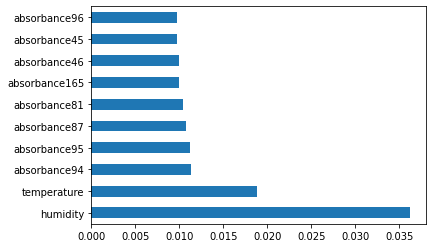

In [17]:
train = pd.read_csv(train_dir)
data = train.drop(["Reading_ID"], axis=1)
X = data.iloc[:,:172]  #independent columns
y = data.iloc[:,172:]    #target columns
# from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3.2 Feature Importance from 0 To 34 

[0.03524458 0.02885214 0.03084957 0.03187725 0.03627724 0.0463233
 0.04719541 0.03389382 0.02637517 0.0282986  0.02939542 0.02748456
 0.02837931 0.02746509 0.02937045 0.0343174  0.0311754  0.026939
 0.02279969 0.01965501 0.02085481 0.02186556 0.02186041 0.01927952
 0.01779814 0.01875579 0.02085049 0.02259851 0.02221704 0.02271236
 0.02452472 0.02957222 0.03355081 0.03760841 0.04378283]


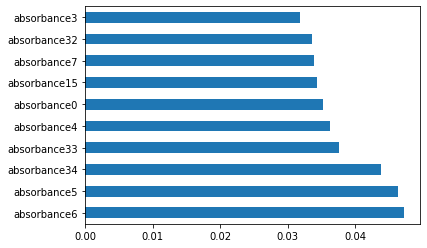

In [18]:
train = pd.read_csv(train_dir)
data = train.drop(["Reading_ID"], axis=1)
X = data.iloc[:,:35]  #independent columns
y = data.iloc[:,172:]    #target columns
# from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3.3 Feature Importance from 35 To 69 

[0.03197931 0.0317311  0.03027812 0.02763446 0.02786436 0.02516811
 0.02776791 0.03023707 0.03651991 0.04026572 0.04893862 0.04404443
 0.03713364 0.03908344 0.03297698 0.02482829 0.02288104 0.02405651
 0.02367252 0.02482482 0.02408149 0.02273453 0.02246505 0.02511454
 0.03118497 0.03219929 0.0262474  0.01807511 0.01560091 0.01781897
 0.0196664  0.02282673 0.02550786 0.03195747 0.03263293]


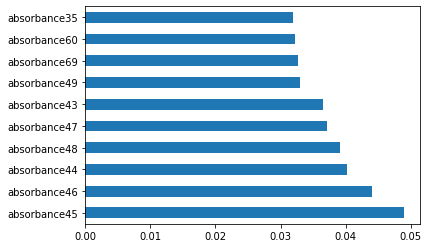

In [19]:
train = pd.read_csv(train_dir)
data = train.drop(["Reading_ID"], axis=1)
X = data.iloc[:,35:70]  #independent columns
y = data.iloc[:,172:]    #target columns
# from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3.4 Feature Importance from  70 To 104

[0.02582379 0.0259535  0.02488818 0.02266103 0.02133878 0.0272206
 0.02627341 0.0238987  0.0265868  0.0268112  0.02411778 0.03598195
 0.03456484 0.02696315 0.02803942 0.02899965 0.0320361  0.03034331
 0.02920215 0.02598094 0.0252989  0.029532   0.02728687 0.02974378
 0.02939821 0.03061991 0.03068734 0.02869091 0.02703283 0.02819768
 0.02805188 0.02795046 0.03270563 0.03563673 0.04148156]


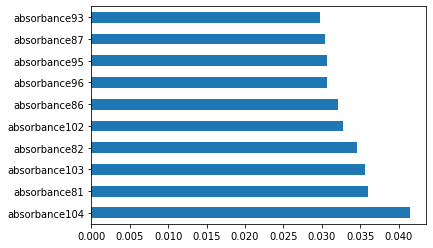

In [20]:
train = pd.read_csv(train_dir)
data = train.drop(["Reading_ID"], axis=1)
X = data.iloc[:,70:105]  #independent columns
y = data.iloc[:,172:]    #target columns
# from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3.5 Feature Importance from 105 to139

[0.03352205 0.02921392 0.0287718  0.02634311 0.02685442 0.02695608
 0.02685546 0.02687141 0.02591503 0.02717986 0.02460325 0.02338752
 0.02271513 0.02131295 0.02138382 0.02508971 0.02223969 0.02134388
 0.02213841 0.02192892 0.02603213 0.02294329 0.02480548 0.02510006
 0.02730244 0.02895268 0.02884807 0.03032057 0.03045627 0.03255459
 0.0391659  0.03878945 0.0418411  0.04491979 0.05334177]


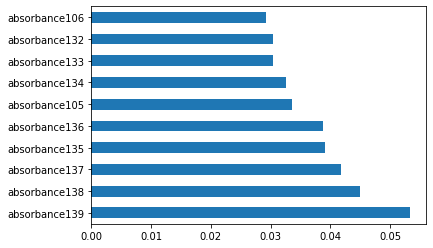

In [21]:
train = pd.read_csv(train_dir)
data = train.drop(["Reading_ID"], axis=1)
X = data.iloc[:,105:140]  #independent columns
y = data.iloc[:,172:]    #target columns
# from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3.6 Feature Importance from 140 to172

[0.04609523 0.03804752 0.03351515 0.0276257  0.02525133 0.0210141
 0.01899171 0.0188539  0.01668564 0.01755541 0.01894526 0.01776703
 0.02036941 0.02152928 0.0224001  0.02225186 0.02241948 0.02420557
 0.0216041  0.01993101 0.01934004 0.02025203 0.02488827 0.02936802
 0.03491627 0.03877606 0.03875389 0.0336437  0.02955481 0.02229758
 0.08928554 0.143865  ]


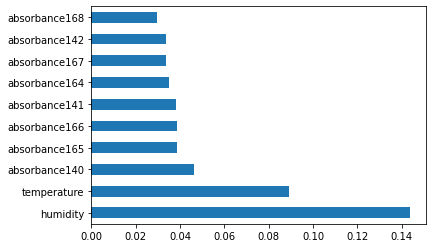

In [22]:
train = pd.read_csv(train_dir)
data = train.drop(["Reading_ID"], axis=1)
X = data.iloc[:,140:172]  #independent columns
y = data.iloc[:,172:]    #target columns
# from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [23]:
X

,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,...,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01
1,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,...,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09
2,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,...,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80
3,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,...,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93
4,1.402808,1.388843,1.378993,1.370712,1.364764,1.352886,1.353532,1.346231,1.332744,1.326119,...,1.296753,1.272020,1.272303,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13135,1.342472,1.334482,1.326614,1.314757,1.301887,1.292316,1.296431,1.281496,1.278615,1.268085,...,1.214382,1.208455,1.202338,1.189651,1.182641,1.206917,1.188173,1.188303,34.79,36.93
13136,1.518922,1.508497,1.501945,1.487737,1.481170,1.457265,1.444710,1.452271,1.428153,1.421319,...,1.379885,1.378378,1.367057,1.388165,1.375223,1.372435,1.395317,1.387709,43.12,19.14
13137,1.487541,1.481796,1.460926,1.458425,1.445150,1.430362,1.427516,1.420605,1.414007,1.415796,...,1.362808,1.385546,1.386140,1.396862,1.377644,1.428150,1.447840,1.384221,42.48,43.41
13138,1.326455,1.322705,1.310202,1.302262,1.294962,1.287724,1.283147,1.269678,1.257537,1.259994,...,1.217364,1.208545,1.185192,1.181483,1.172430,1.174544,1.154095,1.212907,41.86,35.10


## 4. Correlation Matrix with Heatmap

### Correlation from 0 To 19 

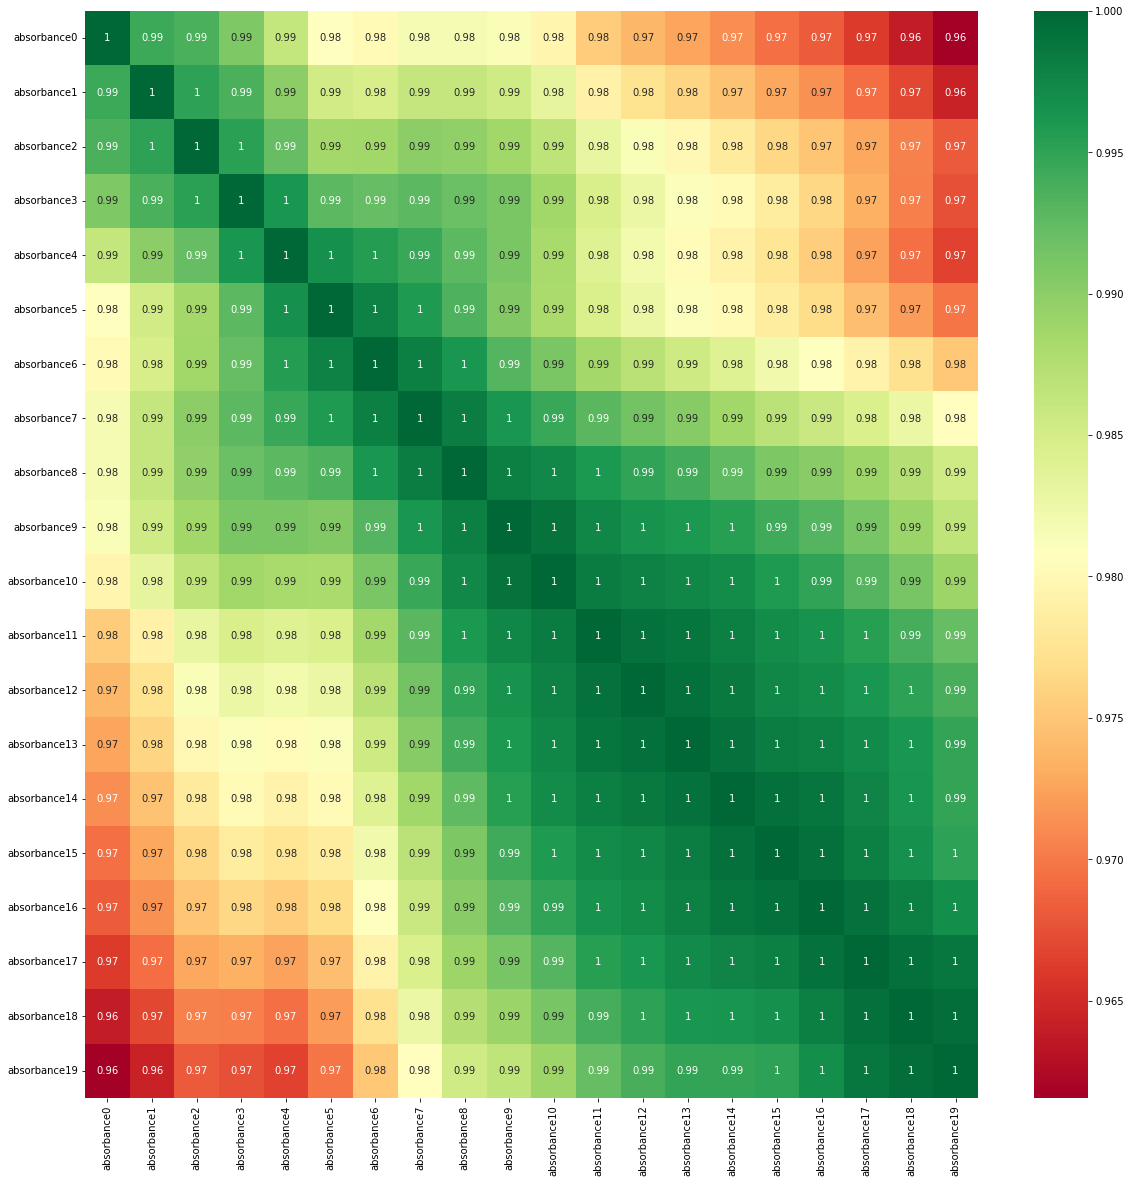

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
train_data = pd.read_csv(train_dir)
train_data.drop(["Reading_ID"], axis=1, inplace=True)
X = train_data.iloc[:,:40]  #independent columns
y = train_data.iloc[:,172]    #target columns
data = train_data.iloc[:,:20]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Correlation from 20 to 39

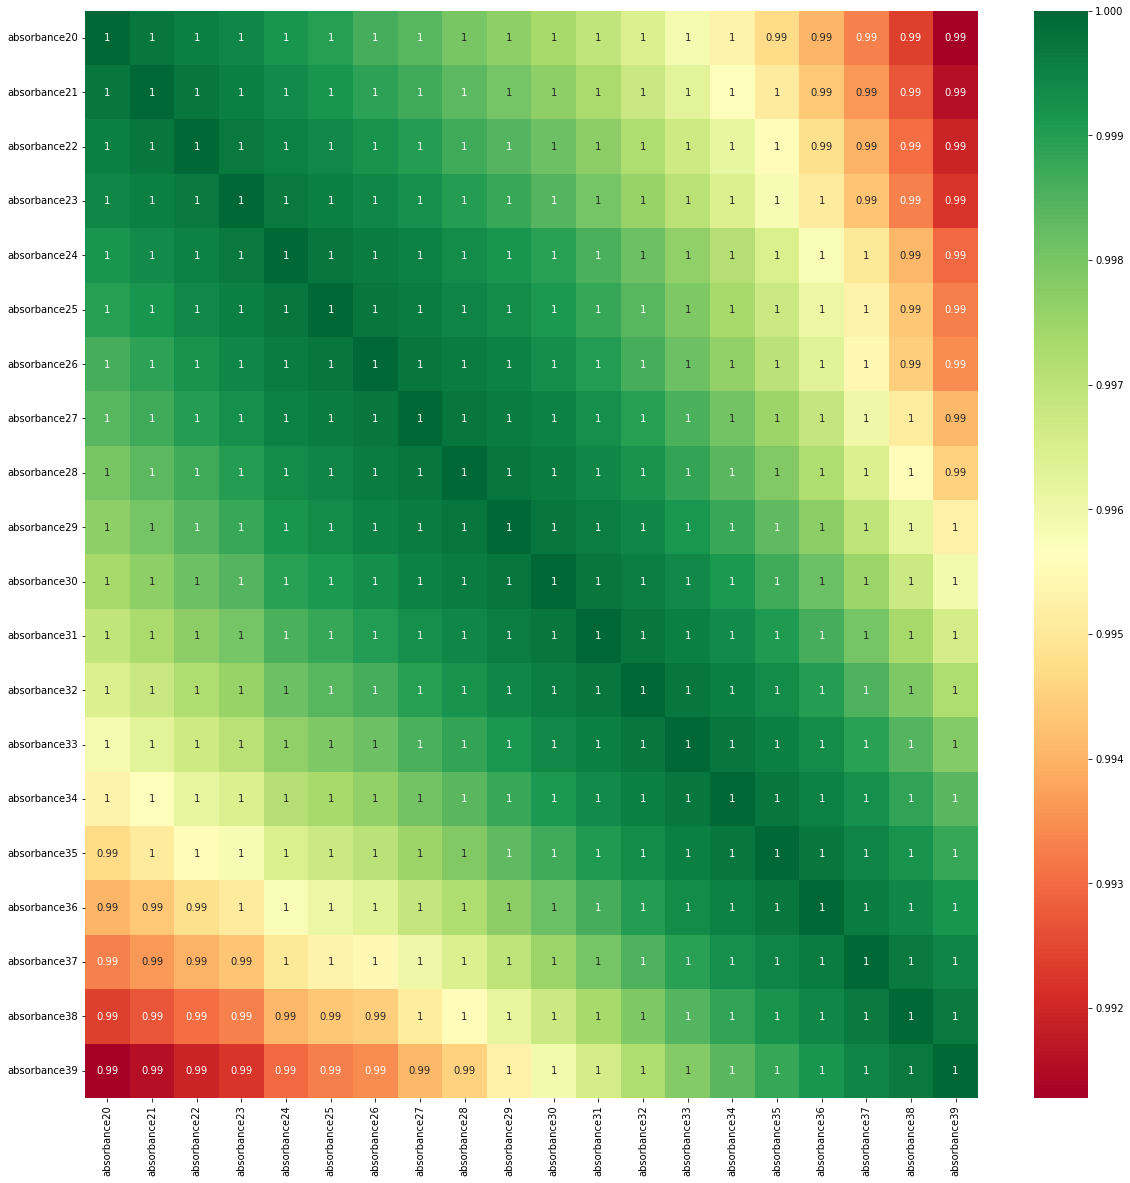

In [25]:
train_data = pd.read_csv(train_dir)
train_data.drop(["Reading_ID"], axis=1, inplace=True)
X = train_data.iloc[:,:40]  #independent columns
y = train_data.iloc[:,172]    #target columns
data = train_data.iloc[:,20:40]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Correaltion from 40 To 59

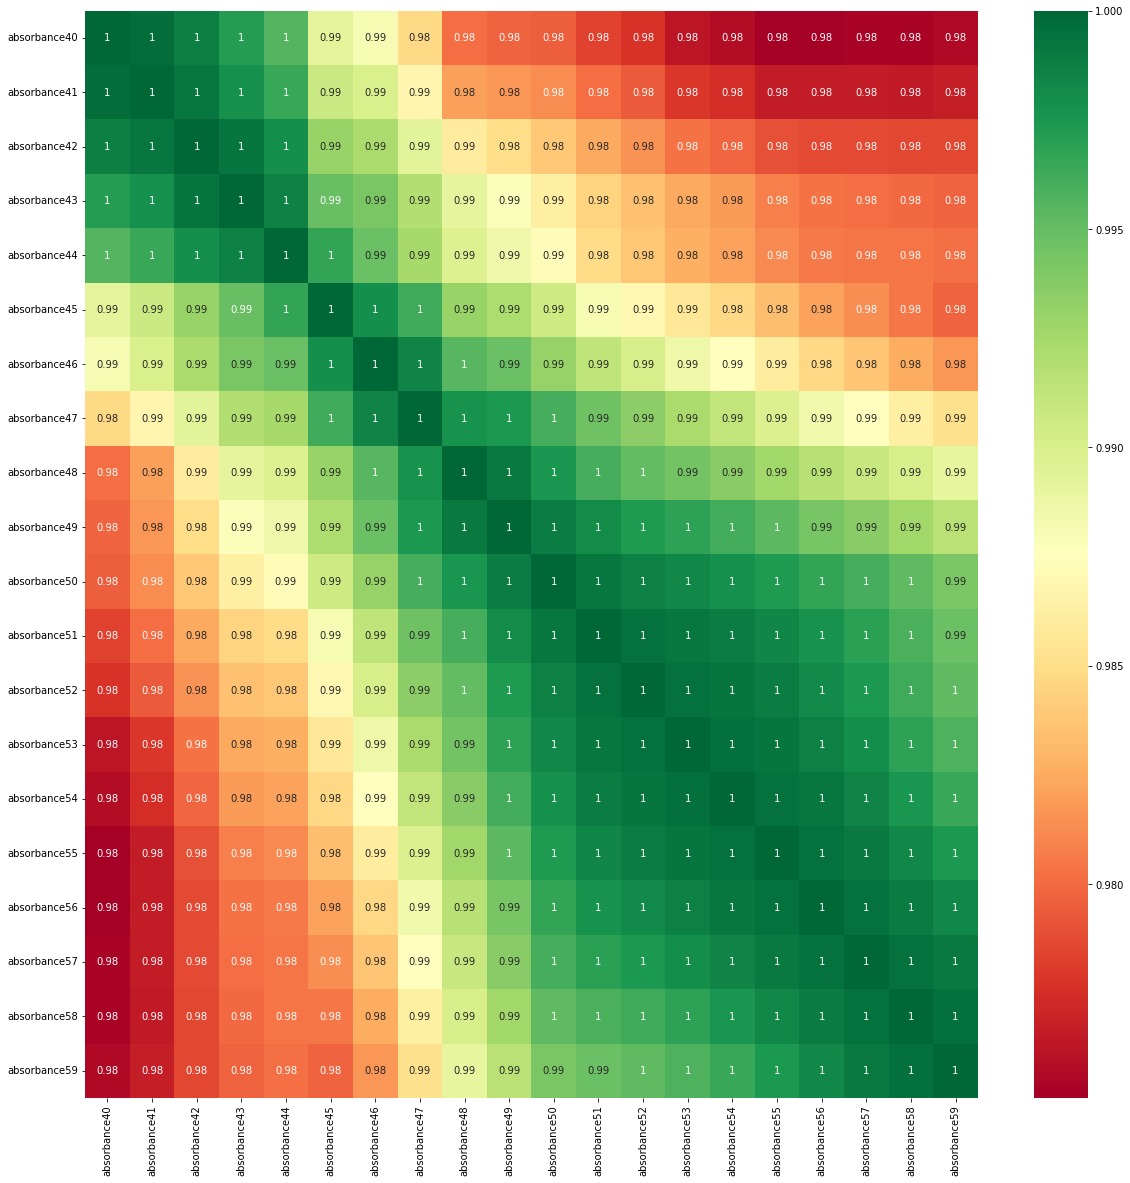

In [26]:
train_data = pd.read_csv(train_dir)
train_data.drop(["Reading_ID"], axis=1, inplace=True)
X = train_data.iloc[:,:40]  #independent columns
y = train_data.iloc[:,172]    #target columns
data = train_data.iloc[:,40:60]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Correlation from 60 To 80

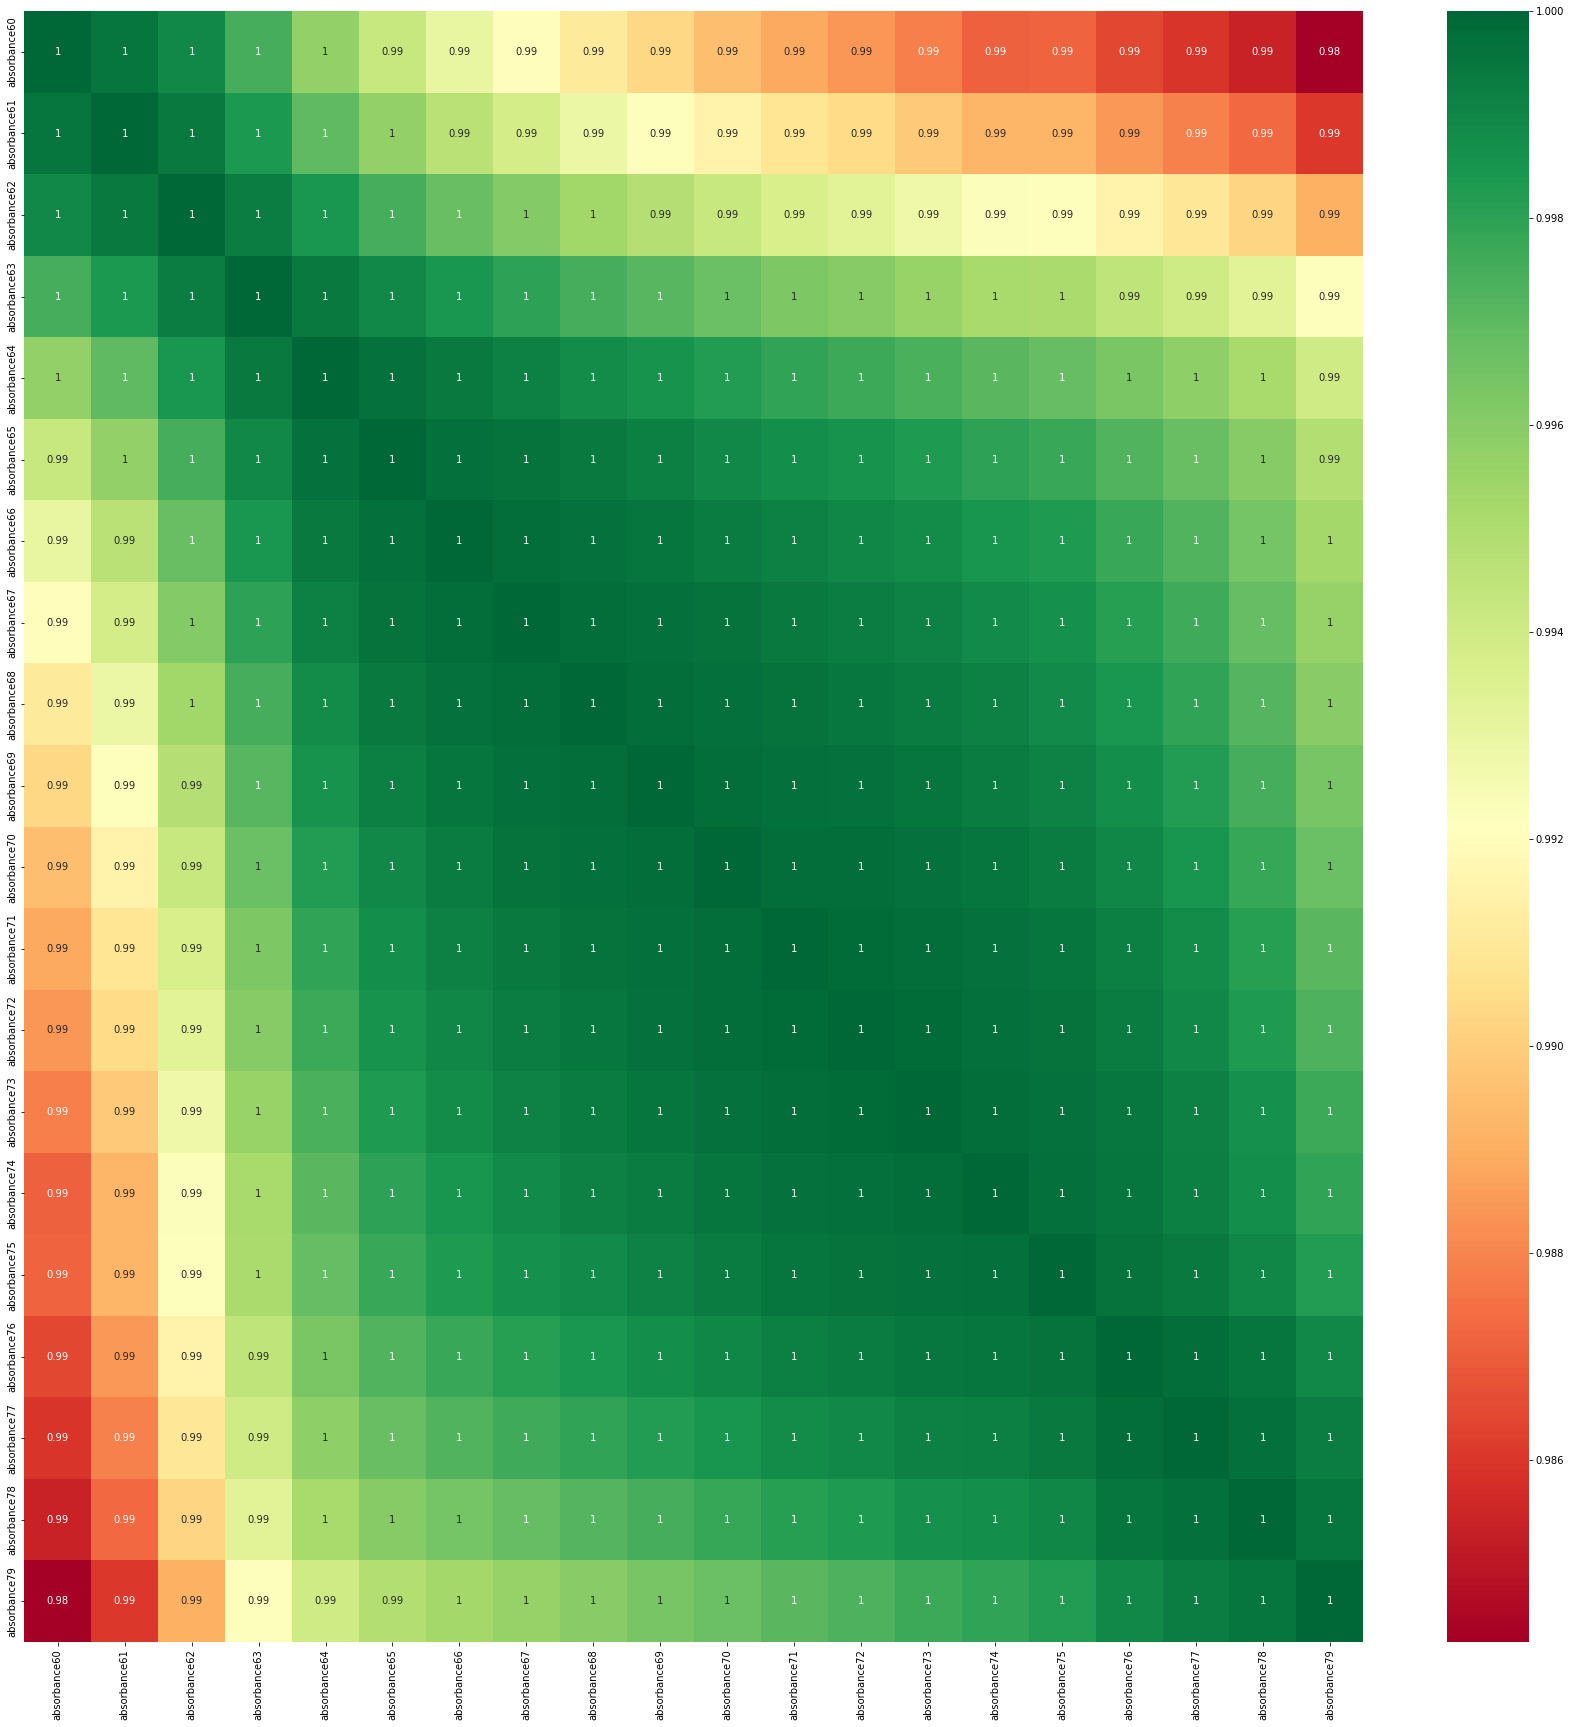

In [27]:
train_data = pd.read_csv(train_dir)
train_data.drop(["Reading_ID"], axis=1, inplace=True)
X = train_data.iloc[:,:40]  #independent columns
y = train_data.iloc[:,172]    #target columns
data = train_data.iloc[:,60:80]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# df = pd.read_csv(train_dir)

# df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# X_variables = df[:,:20] #df[['total_rooms','total_bedrooms','median_income']]

# vif_data = pd.DataFrame()
# vif_data["feature"] = X_variables.columns
# vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]


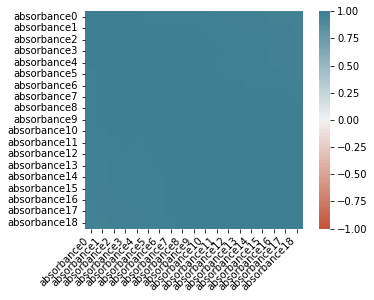

In [29]:
data = pd.read_csv(train_dir)
data =data.iloc[:,:20]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Use Features

In [30]:
train = pd.read_csv(train_dir)
train_data = train.drop(["Reading_ID"], axis=1)
X_train = train_data[['absorbance3','absorbance0','absorbance32','absorbance15','absorbance7','absorbance4','absorbance33','absorbance103',
                     'absorbance34','absorbance5','absorbance6','absorbance35','absorbance49','absorbance36','absorbance69',
                     'absorbance43','absorbance47','absorbance44','absorbance48','absorbance46','absorbance45','absorbance87',
                     'absorbance95','absorbance94','absorbance102','absorbance86','absorbance101','absorbance82','absorbance81',
                     'absorbance133','absorbance106','absorbance131','absorbance134','absorbance105','absorbance135','absorbance136',
                     'absorbance137','absorbance138','absorbance139','absorbance168','absorbance167','absorbance142','absorbance164',
                     'absorbance104','absorbance141','absorbance166','absorbance165','absorbance140','temperature','humidity']]

In [31]:
X_train = X_train.to_numpy()

In [32]:
X_train = np.array(X_train, dtype=float)


In [33]:
X_train.shape

(13140, 50)

In [34]:
y_train = train_data.to_numpy()
y_train = y_train[:,172:]

In [35]:
y_train

array([['ok', 'ok', 'ok'],
       ['ok', 'high', 'high'],
       ['ok', 'ok', 'high'],
       ...,
       ['ok', 'ok', 'ok'],
       ['ok', 'ok', 'ok'],
       ['high', 'ok', 'high']], dtype=object)

# Model

In [30]:
labels_n = np.zeros(y_train.shape)
labels_n[np.where(y_train=='low')] = 0
labels_n[np.where(y_train=='ok')] = 1
labels_n[np.where(y_train=='high')] = 2

## Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import pickle

rf = RandomForestClassifier(random_state=1) 
# params_rf = {'n_estimators': [50, 100, 200]}

multi_output_rf = MultiOutputClassifier(rf, n_jobs=-1)
model = multi_output_rf.fit(X_train,labels_n)

# save the model to disk
filename = r'D:\zindi\blood_ai\random_forest.sav'
pickle.dump(model, open(filename, 'wb'))

# rf_best = multi_output_rf.estimator_
# print(multi_output_rf.best_params_)


In [ ]:
# ['y_{} class_{}'.format(idx,klass) for idx,forest in enumerate(multi_target_forest.estimators_) \
#                                     for klass in forest.classes_]

In [ ]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

logreg = LogisticRegression(random_state=1)
multi_output_logistic = MultiOutputClassifier(logreg, n_jobs=-1)
model = multi_output_logistic.fit(X_train, labels_n)

# save the model to disk
filename = r'D:\zindi\blood_ai\logistic_regression.sav'
pickle.dump(model, open(filename, 'wb'))

# print('Accuracy of Logistic regression classifier on training set: {:.2f}'
#      .format(logreg.score(X_train, y_train)))
# print('Accuracy of Logistic regression classifier on test set: {:.2f}'
#      .format(logreg.score(X_test, y_test)))

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)
multi_output_dt = MultiOutputClassifier(clf, n_jobs=-1)
model = multi_output_dt.fit(X_train, labels_n)

filename = r'D:\zindi\blood_ai\decision_tree.sav'
pickle.dump(model, open(filename, 'wb'))
# print('Accuracy of Decision Tree classifier on training set: {:.2f}'
#      .format(clf.score(X_train, y_train)))
# print('Accuracy of Decision Tree classifier on test set: {:.2f}'
#      .format(clf.score(X_test, y_test)))

In [1]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
multi_output_logistic = MultiOutputClassifier(svm, n_jobs=-1)
model = multi_output_logistic.fit(X_train, labels_n)
# svm.fit(X_train, y_train)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
multi_output_knn = MultiOutputClassifier(knn, n_jobs=-1)
model = multi_output_knn.fit(X_train, labels_n)

filename = r'D:\zindi\blood_ai\knn.sav'
pickle.dump(model, open(filename, 'wb'))
# knn.fit(X_train, y_train)
# print('Accuracy of K-NN classifier on training set: {:.2f}'
#      .format(model.score(X_train, labels_n)))
# print('Accuracy of K-NN classifier on test set: {:.2f}'
#      .format(knn.score(X_test, y_test)))

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression(random_state=1)
multi_output_logistic = MultiOutputClassifier(logreg, n_jobs=-1)

rf = RandomForestClassifier(random_state=1) 
multi_output_rf = MultiOutputClassifier(rf, n_jobs=-1)


clf = DecisionTreeClassifier(random_state=1)
multi_output_dt = MultiOutputClassifier(clf, n_jobs=-1)

model = VotingClassifier(estimators=[('lr', multi_output_logistic), ('dt', multi_output_dt), ('rf', multi_output_rf)], voting='hard')
model.fit(X_train,labels_n)

NotImplementedError: Multilabel and multi-output classification is not supported.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

C:\Users\TECHNORON\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5888127853881278


In [59]:
def myModel(features):
    output = model.predict(features)
    return output

In [60]:
test = pd.read_csv(test_dir)
idx = test.Reading_ID.values

In [61]:
test.drop(["Reading_ID"], axis=1, inplace=True)
 

In [62]:
test_data = test[['absorbance3','absorbance0','absorbance32','absorbance15','absorbance7','absorbance4','absorbance33','absorbance103',
                     'absorbance34','absorbance5','absorbance6','absorbance35','absorbance49','absorbance36','absorbance69',
                     'absorbance43','absorbance47','absorbance44','absorbance48','absorbance46','absorbance45','absorbance87',
                     'absorbance95','absorbance94','absorbance102','absorbance86','absorbance101','absorbance82','absorbance81',
                     'absorbance133','absorbance106','absorbance131','absorbance134','absorbance105','absorbance135','absorbance136',
                     'absorbance137','absorbance138','absorbance139','absorbance168','absorbance167','absorbance142','absorbance164',
                     'absorbance104','absorbance141','absorbance166','absorbance165','absorbance140','temperature','humidity']]



In [63]:
test_data = test_data.to_numpy()

In [64]:
type(test_data)
test_data.shape


(3660, 50)

## load Models 

In [170]:
rf_model = pickle.load(open(r'D:\zindi\blood_ai\random_forest.sav', 'rb'))

In [171]:
logreg_model = pickle.load(open(r'D:\zindi\blood_ai\logistic_regression.sav','rb'))

In [172]:
cart_model = pickle.load(open(r'D:\zindi\blood_ai\decision_tree.sav','rb'))

In [173]:
knn_model = pickle.load(open(r'D:\zindi\blood_ai\knn.sav','rb'))

In [174]:
rf_pred=rf_model.predict(test_data)
logreg_pred=logreg_model.predict(test_data)
cart_pred=cart_model.predict(test_data)
knn_pred=knn_model.predict(test_data)

In [176]:
cart_pred

array([[0., 1., 2.],
       [1., 1., 1.],
       [1., 1., 2.],
       ...,
       [1., 1., 2.],
       [0., 1., 1.],
       [0., 1., 2.]])

In [175]:
logreg_pred

array([[1., 1., 2.],
       [1., 1., 1.],
       [1., 1., 2.],
       ...,
       [1., 1., 1.],
       [1., 1., 2.],
       [1., 1., 1.]])

In [139]:
rf_pred

array([[1., 1., 2.],
       [1., 1., 1.],
       [1., 1., 2.],
       ...,
       [1., 1., 0.],
       [1., 1., 1.],
       [0., 1., 1.]])

In [177]:
knn_pred

array([[1., 1., 2.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 2.],
       [0., 1., 2.],
       [1., 2., 1.]])

In [148]:
from scipy.stats import mode
result = []
for i in range(0,len(test_data)):
    result.append([mode(rf_pred[i]),mode(logreg_pred[i]),mode(cart_pred[i])])

In [150]:
result = np.array(result)
result.shape

(3660, 3, 2, 1)

In [132]:
result.shape
result = np.squeeze(result)
result = np.squeeze(result)
result.shape
# result = result.reshape(3660,3)


(3660, 3, 2)

In [161]:
from scipy.stats import mode
predictions =[]
# predictions = np.array([])
for i in range(0,len(test_data)):
    predictions.append(mode([rf_pred[i], logreg_pred[i],cart_pred[i],knn_pred[i]]))
#     predictions = np.append(predictions,mode([rf_pred[i], logreg_pred[i],cart_pred[i], knn_pred[i]]))

In [162]:
predictions = np.array(predictions)
# predictions = np.squeeze(predictions) 
# predictions = np.squeeze(predictions)
# predictions = np.squeeze(predictions)

In [168]:
predictions = predictions.reshape(3660,6)
# flat_pred = predictions.flatten()
# reshape_pred = flat_pred.reshape(3660,-1)
# reshape_pred
predictions

array([[1., 1., 2., 3., 4., 4.],
       [1., 1., 1., 4., 4., 4.],
       [1., 1., 2., 4., 4., 3.],
       ...,
       [1., 1., 2., 4., 4., 2.],
       [0., 1., 1., 2., 4., 2.],
       [0., 1., 1., 2., 3., 3.]])

In [100]:
# predictions = myModel(test_data)
# Save the results to csv
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]
ss["hemoglobin(hgb)_human"] = predictions[:,1]
ss["cholesterol_ldl_human"] = predictions[:,2]

ValueError: Wrong number of dimensions. values.ndim > ndim [3 > 2]

In [64]:
ss

,Reading_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_37BEI22R,0.0,1.0,2.0
1,ID_4W85V5DV,1.0,1.0,1.0
2,ID_L4YR3NDY,1.0,1.0,2.0
3,ID_U88E3SQ6,2.0,1.0,1.0
4,ID_NW7Z3XU7,1.0,1.0,2.0
...,...,...,...,...
3655,ID_ADCBL266,0.0,1.0,1.0
3656,ID_SW51B61O,0.0,2.0,2.0
3657,ID_CO8IHJRA,1.0,1.0,2.0
3658,ID_VN5CP3ZZ,0.0,1.0,1.0


In [65]:
def transform(value):
    if value == 0.0:
        return 'low'
    elif value == 1.0:
        return 'ok'
    else:
        return 'high'

In [66]:
ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x:transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x:transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x:transform(x))

In [67]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [68]:
hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))

In [69]:
def transform_hemo(row):
    return str(row["Reading_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

In [70]:
hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))

In [71]:
def transform_c_ldl(row):
    return str(row["Reading_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

In [72]:
ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))

In [73]:
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [74]:
ss

,0
0,ID_37BEI22R_hdl_cholesterol_human-low
1,ID_4W85V5DV_hdl_cholesterol_human-ok
2,ID_L4YR3NDY_hdl_cholesterol_human-ok
3,ID_U88E3SQ6_hdl_cholesterol_human-high
4,ID_NW7Z3XU7_hdl_cholesterol_human-ok
...,...
10975,ID_ADCBL266_cholesterol_ldl_human-ok
10976,ID_SW51B61O_cholesterol_ldl_human-high
10977,ID_CO8IHJRA_cholesterol_ldl_human-high
10978,ID_VN5CP3ZZ_cholesterol_ldl_human-ok


In [75]:
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])

In [76]:
ss = ss.rename(columns={0:"Reading_ID"})

In [77]:
ss.to_csv(main_dir+"/submission_1.5"+"/submission.csv", index=False)